In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
print(len(glob('UCF11_updated_mpg/*/*/*.mpg')))

1600


In [3]:
file_paths = glob('UCF11_updated_mpg/*/*/*.mpg')

In [4]:
print(file_paths[0])

UCF11_updated_mpg\basketball\v_shooting_01\v_shooting_01_01.mpg


In [5]:
cap = cv2.VideoCapture(file_paths[0])

frames = []
while True:
    ret, frame = cap.read() # ret: 도형 객체 만들기 / frame: 이미지를 전달받는 변수
    if not ret:
        break
    
    frame = cv2.resize(frame,(256,256))
    frame = frame[:,:,[2,1,0]] # 3번째 요소: 색상(BGR -> RGB)
    frames.append(frame)

cap.release()

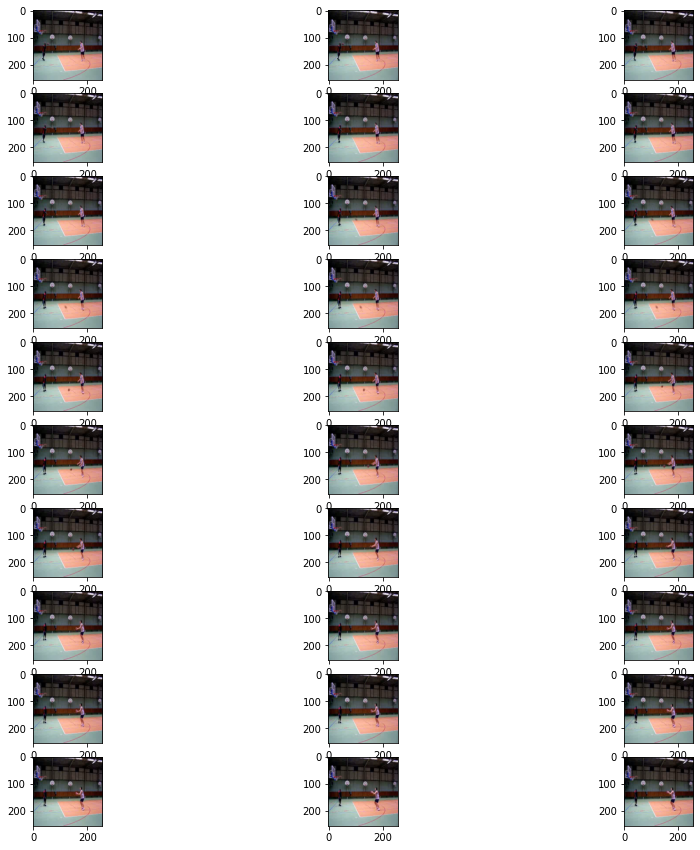

In [6]:
arr = np.array(frames)
plt.figure(figsize = (15,15))

for i in range(10):
    plt.subplot(10,3,1 + 3*i)
    plt.imshow(arr[1 + 3 * i])
    plt.subplot(10,3,2 + 3*i)
    plt.imshow(arr[2 + 3 * i])
    plt.subplot(10,3,3 + 3*i)
    plt.imshow(arr[3 + 3 * i])

In [7]:
len(frames) / 29.97

3.6036036036036037

In [8]:
for file_path in file_paths:
    cap = cv2.VideoCapture(file_path)
    print(file_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(length, 'frames')
    print(length / 29.97,'sec')
    cap.release()
    break

UCF11_updated_mpg\basketball\v_shooting_01\v_shooting_01_01.mpg
107 frames
3.570236903570237 sec


In [9]:
# 개인 프로젝트 할 때 써먹을 부분
import pandas as pd

df = pd.DataFrame(columns = [
    'file_path','frames','duration','label'
])

for file_path in file_paths:
    label = file_path.split('\\')[1] # \로 split을 시켜서 그 이름들을 label로 쓰겠다.
    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frames/29.97
    elem = {
        'file_path':file_path,
        'frames':frames,
        'duration':duration,
        'label':label
    }
    df.loc[len(df)] = elem
    cap.release()

In [10]:
df

,file_path,frames,duration,label
0,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,107,3.570237,basketball
1,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,139,4.637971,basketball
2,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,148,4.938272,basketball
3,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,100,3.336670,basketball
4,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,140,4.671338,basketball
...,...,...,...,...
1595,UCF11_updated_mpg\walking\v_walk_dog_24\v_walk...,239,7.974641,walking
1596,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking
1597,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking
1598,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking


In [ ]:
# label별로 group을 맺어 총 영상의 길이를 출력
# label, sum(영상길이)

# 내 코드
df.groupby('label')['duration'].sum() # df.groupby(묶음의 기준이 되는 컬럼)[어떤 컬럼의 값 구할건지].함수명()

In [11]:
# label별로 group을 맺어 총 영상의 길이를 출력
# label, sum(영상길이)

# 강사님 코드
df_duration_sum_by_label = df.groupby('label').duration.sum().rename('Sum').reset_index('label')

df_duration_sum_by_label

,label,Sum
0,basketball,639.139139
1,biking,1094.060727
2,diving,891.157824
3,golf_swing,786.586587
4,horse_riding,1296.429763
5,soccer_juggling,1522.655989
6,swing,921.588255
7,tennis_swing,883.416750
8,trampoline_jumping,799.799800
9,volleyball_spiking,428.128128


In [12]:
df.groupby('label')['duration'].mean()

label
basketball            4.532902
biking                7.545246
diving                5.712550
golf_swing            5.539342
horse_riding          6.547625
soccer_juggling       9.760615
swing                 6.726922
tennis_swing          5.289921
trampoline_jumping    6.721007
volleyball_spiking    3.690760
walking               7.488790
Name: duration, dtype: float64

In [13]:
df_duration_avg_by_label = df.groupby('label').duration.mean().rename('Average').reset_index('label')

df_duration_avg_by_label

,label,Average
0,basketball,4.532902
1,biking,7.545246
2,diving,5.712550
3,golf_swing,5.539342
4,horse_riding,6.547625
5,soccer_juggling,9.760615
6,swing,6.726922
7,tennis_swing,5.289921
8,trampoline_jumping,6.721007
9,volleyball_spiking,3.690760


<AxesSubplot:>

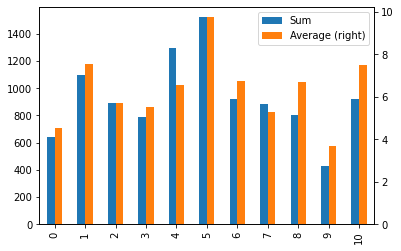

In [14]:
df_video_stats = pd.concat([df_duration_sum_by_label,df_duration_avg_by_label],axis = 1)
df_video_stats.plot.bar(secondary_y = 'Average')

In [16]:
df['> 10.0 sec'] = df['duration'] >= 10.0
df['5.0 - 10.0 sec'] = (df['duration'] >= 5.0) & (df['duration'] < 10.0)
df['2.0 - 5.0 sec'] = (df['duration'] >= 2.0) & (df['duration'] < 5.0)
df['0.0 - 2.0 sec'] = (df['duration'] >= 0.0) & (df['duration'] < 2.0)
df

,file_path,frames,duration,label,> 10.0 sec,5.0 - 10.0 sec,2.0 - 5.0 sec,0.0 - 2.0 sec
0,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,107,3.570237,basketball,False,False,True,False
1,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,139,4.637971,basketball,False,False,True,False
2,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,148,4.938272,basketball,False,False,True,False
3,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,100,3.336670,basketball,False,False,True,False
4,UCF11_updated_mpg\basketball\v_shooting_01\v_s...,140,4.671338,basketball,False,False,True,False
...,...,...,...,...,...,...,...,...
1595,UCF11_updated_mpg\walking\v_walk_dog_24\v_walk...,239,7.974641,walking,False,True,False,False
1596,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False
1597,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False
1598,UCF11_updated_mpg\walking\v_walk_dog_25\v_walk...,239,7.974641,walking,False,True,False,False


In [26]:
# 다시 연습해보기(re)
df_groupby_label = df.groupby('label')

df_groupby_stats = pd.concat(
    [
        df_groupby_label['0.0 - 2.0 sec'].sum().reset_index().set_index('label'),
        df_groupby_label['2.0 - 5.0 sec'].sum().reset_index().set_index('label'),
        df_groupby_label['5.0 - 10.0 sec'].sum().reset_index().set_index('label'),
        df_groupby_label['> 10.0 sec'].sum().reset_index().set_index('label'),
    ],axis = 1)

df_groupby_stats

,0.0 - 2.0 sec,2.0 - 5.0 sec,5.0 - 10.0 sec,> 10.0 sec
label,,,,
basketball,5,102,28,6
biking,0,9,113,23
diving,2,57,91,6
golf_swing,0,79,56,7
horse_riding,2,14,180,2
soccer_juggling,0,9,88,59
swing,0,15,104,18
tennis_swing,0,90,70,7
trampoline_jumping,0,12,101,6


<AxesSubplot:xlabel='label', ylabel='Number of Videos'>

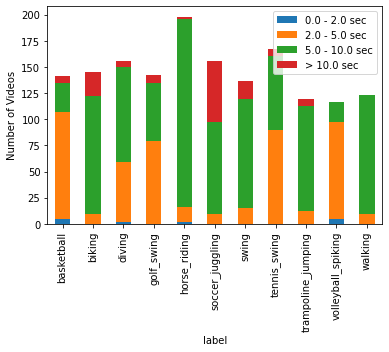

In [27]:
df_groupby_stats.plot.bar(stacked = True, ylabel = 'Number of Videos')

In [42]:
# 11개의 클래스
# 각 클래스 당 25개의 영상 그룹
# 1 ~ 20: 학습 그룹
# 20 ~ 25: 테스트 그룹
import random

label_dirs = glob('UCF11_updated_mpg/*')

train_df = pd.DataFrame(columns = ['file_path','label'])
valid_df = pd.DataFrame(columns = ['file_path','label'])

for label_dir in label_dirs:
    file_dirs = glob(label_dir+'\\v_*')
    random.shuffle(file_dirs)
    
    for i in range(20):
        train_dir = file_dirs[i]
        label = train_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(glob(train_dir + '\\*'))
        train_df.loc[len(train_df)] = [file_path,label]
        
    for i in range(20,25):
        valid_dir = file_dirs[i]
        label = valid_dir.split('\\')[-1].split('_')[1]
        file_path = random.choice(glob(valid_dir + '\\*'))
        valid_df.loc[len(valid_df)] = [file_path,label]

In [43]:
print(len(train_df))
print(len(valid_df))

220
55


In [44]:
train_df

,file_path,label
0,UCF11_updated_mpg\basketball\v_shooting_19\v_s...,shooting
1,UCF11_updated_mpg\basketball\v_shooting_07\v_s...,shooting
2,UCF11_updated_mpg\basketball\v_shooting_03\v_s...,shooting
3,UCF11_updated_mpg\basketball\v_shooting_02\v_s...,shooting
4,UCF11_updated_mpg\basketball\v_shooting_13\v_s...,shooting
...,...,...
215,UCF11_updated_mpg\walking\v_walk_dog_23\v_walk...,walk
216,UCF11_updated_mpg\walking\v_walk_dog_04\v_walk...,walk
217,UCF11_updated_mpg\walking\v_walk_dog_19\v_walk...,walk
218,UCF11_updated_mpg\walking\v_walk_dog_20\v_walk...,walk


In [45]:
valid_df

,file_path,label
0,UCF11_updated_mpg\basketball\v_shooting_09\v_s...,shooting
1,UCF11_updated_mpg\basketball\v_shooting_20\v_s...,shooting
2,UCF11_updated_mpg\basketball\v_shooting_18\v_s...,shooting
3,UCF11_updated_mpg\basketball\v_shooting_10\v_s...,shooting
4,UCF11_updated_mpg\basketball\v_shooting_12\v_s...,shooting
5,UCF11_updated_mpg\biking\v_biking_22\v_biking_...,biking
6,UCF11_updated_mpg\biking\v_biking_20\v_biking_...,biking
7,UCF11_updated_mpg\biking\v_biking_19\v_biking_...,biking
8,UCF11_updated_mpg\biking\v_biking_24\v_biking_...,biking
9,UCF11_updated_mpg\biking\v_biking_16\v_biking_...,biking


In [46]:
import os

os.mkdir('UCF11_updated_png')
os.mkdir('UCF11_updated_png/train')
os.mkdir('UCF11_updated_png/valid')

In [48]:
train_df.to_csv('ucf11_train_vid.csv',index = False)
valid_df.to_csv('ucf11_valid_vid.csv',index = False)

In [51]:
max_frame = 10
SAVE_DIR = 'UCF11_updated_png/'

for i, elem in train_df.iterrows():
    # print('i = ',i)
    # print('elem = ',elem)
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame,(256,256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
    
    label = elem['label']
    
    for j, frame in enumerate(frames):
        file_name = f'train/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name,frame)
        
    cap.release()

In [52]:
print(len(glob(SAVE_DIR + 'train/*')))

2200


In [53]:
max_frame = 10
SAVE_DIR = 'UCF11_updated_png/'

for i, elem in valid_df.iterrows():
    # print('i = ',i)
    # print('elem = ',elem)
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame,(256,256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
    
    label = elem['label']
    
    for j, frame in enumerate(frames):
        file_name = f'valid/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name,frame)
        
    cap.release()

In [54]:
print(len(glob(SAVE_DIR + 'valid/*')))

550
